In [2]:
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline 

In [4]:
import statistics
import seaborn as sns

In [9]:
# mean, median, mode 
df = sns.load_dataset('tips')
print(df.head())

   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4


In [11]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [12]:
np.mean(df['total_bill'])

np.float64(19.78594262295082)

In [13]:
np.median(df['total_bill'])

np.float64(17.795)

In [15]:
statistics.mode(df['total_bill'])

13.42

<Axes: ylabel='total_bill'>

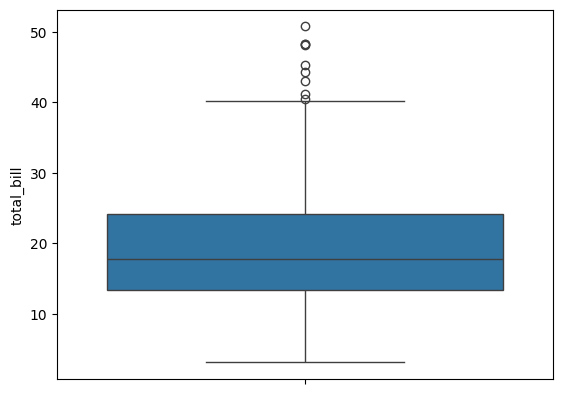

In [17]:
sns.boxplot(df['total_bill'])

<Axes: xlabel='total_bill', ylabel='Count'>

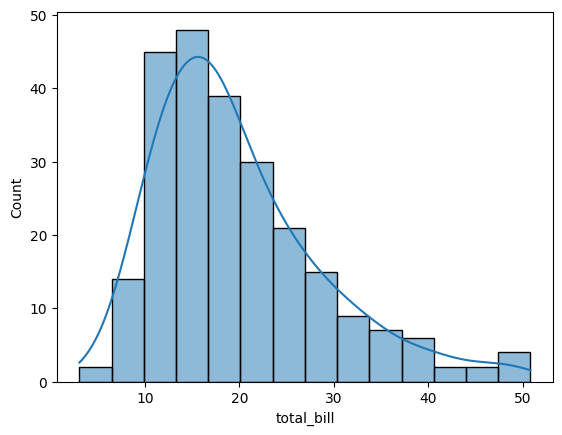

In [19]:
sns.histplot(df['total_bill'], kde=True)

In [20]:
df1 = sns.load_dataset('iris')
df1.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


<Axes: ylabel='petal_length'>

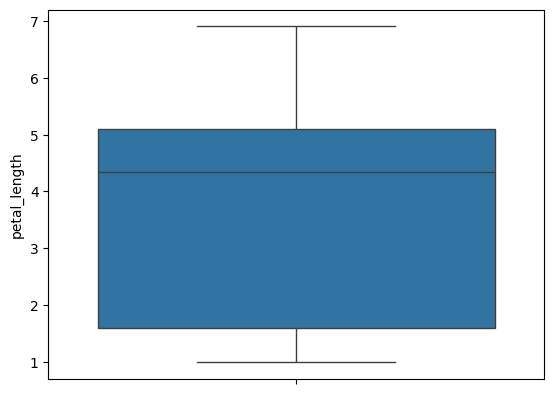

In [24]:
sns.boxplot(df1['petal_length'])

<Axes: xlabel='sepal_width', ylabel='Count'>

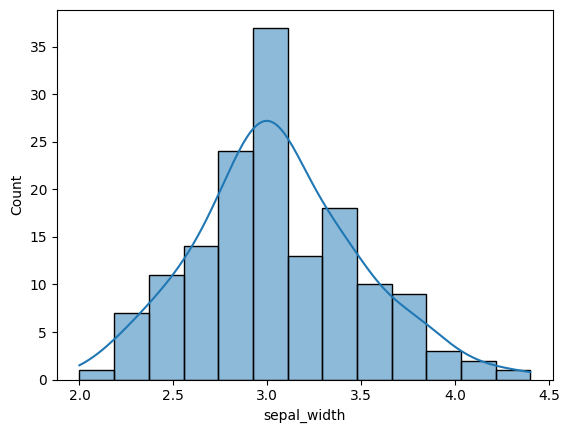

In [27]:
sns.histplot(df1['sepal_width'], kde=True)

<Axes: xlabel='count', ylabel='species'>

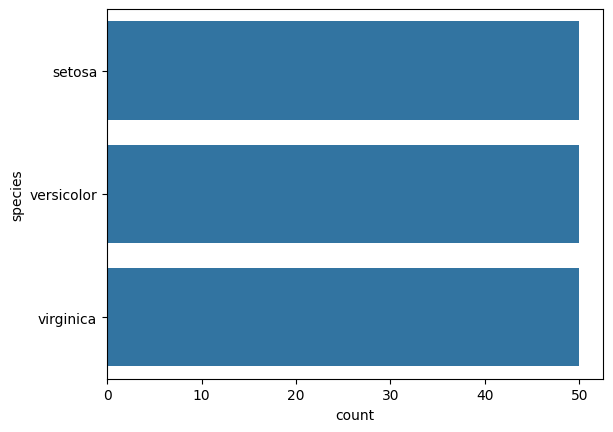

In [28]:
sns.countplot(df1['species'])

In [30]:
np.percentile(df1['sepal_length'], [25, 75])

array([5.1, 6.4])

**Outliners**

In [55]:
dataset = [1,2,3,4,5,6,7,8,9,10,1080,-17,102]

In [56]:
outliers = []
def detect_outliers(data):
    threashold = 3
    mean = np.mean(data)
    std_dev = np.std(data)
    for i in data :
        z_score = (i-mean)/std_dev
        if np.abs(z_score) > threashold:
            outliers.append(i)
    return outliers


   

(array([11.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([ -17. ,   92.7,  202.4,  312.1,  421.8,  531.5,  641.2,  750.9,
         860.6,  970.3, 1080. ]),
 <BarContainer object of 10 artists>)

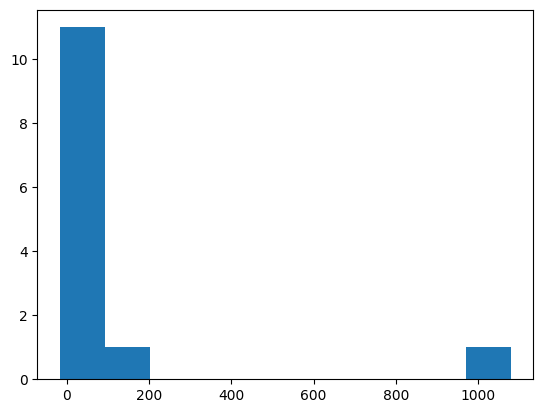

In [57]:
plt.hist(dataset)

In [58]:
detect_outliers(dataset)

[1080]

Q1: 3.0
Q3: 9.0
IQR: 6.0
Lower Bound: -6.0
Upper Bound: 18.0
Outliers: [-17, 102, 1080]


{'whiskers': [<matplotlib.lines.Line2D at 0x2246871fbc0>,
 'caps': [<matplotlib.lines.Line2D at 0x22469f0c200>,
 'boxes': [<matplotlib.lines.Line2D at 0x22463c332f0>],
 'medians': [<matplotlib.lines.Line2D at 0x22469f0c650>],
 'fliers': [<matplotlib.lines.Line2D at 0x22469f0c8f0>],
 'means': []}

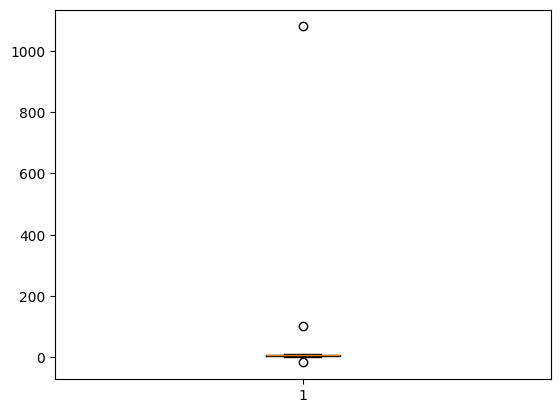

In [60]:
#IQR (interquartile range )
# sort the data 
#calculae Q1 and Q3
# calculate IQR = Q3 - Q1
#find lower and upper bound
# lower bound = Q1 - 1.5 * IQR
# upper bound = Q3 + 1.5 * IQR

dataset = sorted(dataset)

q1, q3 = np.percentile(dataset, [25, 75])
print("Q1:", q1)
print("Q3:", q3)

iqr = q3 - q1
print("IQR:", iqr)

#lower_bound = q1 - 1.5 * iqr
lower_bound = q1 - 1.5 * iqr
print("Lower Bound:", lower_bound)
#upper_bound = q3 + 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
print("Upper Bound:", upper_bound)

outliers =[]
for i in dataset:
    if i < lower_bound or i > upper_bound:
        outliers.append(i)
print("Outliers:", outliers)
plt.boxplot(dataset)


In [ ]:
# Suppose the IQ in a certain population is normally distributed with a mean of Mu = 100 and standard 
# deviation of sigma = 15. 
# A researcher wants to know if a new drug affects IQ levels, so he recruits 20 patients to try it and 
# records their IQ levels. 
# The following code shows how to perform a one sample z-test in Python to determine if the new drug 
# causes a significant difference in IQ levels: 

In [5]:
from statsmodels.stats.weightstats import ztest as ztest

dataset = [88, 92, 94, 94, 96, 97, 97, 97, 99, 99,105, 109, 109, 109, 110, 112, 112, 113, 114, 115]
mu = 100
ztest(dataset, value = mu) 

(np.float64(1.5976240527147705), np.float64(0.11012667014384257))

In [7]:
# t- test 
age = [10, 20, 35,50, 28,40, 55,18, 16,55, 30, 25,43,18, 30, 28,14, 24,16, 17, 32, 35, 26, 27,65, 18,43, 23,21, 20,19, 70]

In [9]:
import numpy as np
ages = np.array(age)
ages_mean = np.mean(ages)
ages_mean

np.float64(30.34375)

In [10]:
sample_size = 10
age_sample = np.random.choice(ages, sample_size)

In [ ]:
print(age_sample)
np.mean(age_sample)

[55 25 16 25 55 50 18 18 17 21]


np.float64(30.0)

: 

In [14]:
from scipy.stats import ttest_1samp
ttest_1samp(age_sample, ages_mean)

TtestResult(statistic=np.float64(-0.06610033714487068), pvalue=np.float64(0.9487429938436837), df=np.int64(9))